In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings('ignore')


In [2]:
claims_data = pd.read_csv("Fianl_claims_data.csv")

In [3]:
claims_data.sample(5)

,Claimant Unique ID,Unique Member Reference,Claim ID,Incurred Date,Paid Date,Condition Code,Impairment Code,Condition Category,Treatment Type,Claim Type,Ancillary Service Type,Treatment Location,Provider Type,Admission Date,Discharge Date,Calculate Length of Service,Claim Amount,Amount Paid,Industry,Client Name,Client Identifier,Scheme Category/ Section Name,Scheme Category/ Section Name Identifier,Status of Member,Year of Birth,Gender,Short Post Code,Contract Start Date,Contract End Date,Age
91240,EMP00007702-02,EMP00007702,CLM00022442,21/05/2023,09/07/2023,M17.0,IMP-MSK-146,Musculoskeletal,Therapeutic,Day Case,Physiotherapy,England,Hospital,21/05/2023,21/05/2023,1,5061.77,4057.48,IT,Fujitsu UK,CLI000000,Advanced Cover,SCH0001,Partner,1969,Female,BS2,13-02-2022,02-12-2024,54
93773,EMP00007900-01,EMP00007900,CLM00089147,23/07/2022,22/08/2022,I50.0,IMP-CVD-151,Cardiovascular,Diagnostic,Inpatient,NaN,England,Hospital,23/07/2022,28/07/2022,5,20845.83,17130.66,Manufacturing,CNH Industrial,CLI000009,Executive Cover,SCH0002,Member,1967,Male,B2,30-06-2020,21-10-2022,55
114526,EMP00009840-01,EMP00009840,CLM00027559,29/12/2020,21/01/2021,I20.0,IMP-CVD-933,Cardiovascular,Medical,Inpatient,Diagnostic Imaging,England,Hospital,29/12/2020,03/01/2021,5,28415.20,24423.25,IT,Sage Group,CLI000004,Standard Plan,SCH0006,Member,1968,Male,L2,16-01-2020,01-05-2021,52
82964,EMP00007050-01,EMP00007050,CLM00111504,26/11/2021,07/12/2021,I50.0,IMP-CVD-972,Cardiovascular,Surgical,Day Case,Diagnostic Imaging,England,Hospital,26/11/2021,26/11/2021,1,14703.98,14427.67,IT,IBM UK,CLI000002,Standard Plan,SCH0006,Member,1974,Male,NE2,18-05-2019,03-01-2022,47
42210,EMP00003560-02,EMP00003560,CLM00013564,25/10/2022,06/11/2022,I48.0,IMP-CVD-802,Cardiovascular,Surgical,Inpatient,Medical Appliances,England,Hospital,25/10/2022,26/10/2022,1,34211.41,31388.96,IT,IBM UK,CLI000002,Standard Plan,SCH0006,Partner,1959,Female,M1,28-02-2022,20-11-2024,63


In [4]:
claims_data['Condition Category'].unique()

array(['Musculoskeletal', 'Respiratory', 'Other', 'Gynaecology',
       'Oncology', 'Ophthalmology', 'Cardiovascular', 'Dermatology',
       'Neurology', 'Urology', 'Mental Health', 'Digestive', 'ENT',
       'Endocrine', 'Rheumatology', 'Orthopaedics', 'Maternity',
       'Haematology', 'Gastroenterology'], dtype=object)

In [5]:
memebrship_data = pd.read_csv("health_insurance_membership_10k_corrected_age.csv")

In [6]:

claims_data['Incurred Date'] = pd.to_datetime(claims_data['Incurred Date'], errors='coerce', dayfirst=True)
claims_data['Contract Start Date'] = pd.to_datetime(claims_data['Contract Start Date'], errors='coerce', dayfirst=True)
claims_data['Contract End Date'] = pd.to_datetime(claims_data['Contract End Date'], errors='coerce', dayfirst=True)
claims_data['Paid Date'] = pd.to_datetime(claims_data['Paid Date'], errors='coerce', dayfirst=True)
claims_data['Admission Date'] = pd.to_datetime(claims_data['Admission Date'], errors='coerce', dayfirst=True)
claims_data['Discharge Date'] = pd.to_datetime(claims_data['Discharge Date'], errors='coerce', dayfirst=True)
print(claims_data.dtypes)

Claimant Unique ID                                  object
Unique Member Reference                             object
Claim ID                                            object
Incurred Date                               datetime64[ns]
Paid Date                                   datetime64[ns]
Condition Code                                      object
Impairment Code                                     object
Condition Category                                  object
Treatment Type                                      object
Claim Type                                          object
Ancillary Service Type                              object
Treatment Location                                  object
Provider Type                                       object
Admission Date                              datetime64[ns]
Discharge Date                              datetime64[ns]
Calculate Length of Service                          int64
Claim Amount                                       float

In [7]:
claims_data['Incurred year'] = claims_data['Incurred Date'].dt.year
claims_data['Incurred month'] = claims_data['Incurred Date'].dt.month
claims_data['Incurred quarter'] = claims_data['Incurred Date'].dt.quarter

In [9]:
claims_data.columns

Index(['Claimant Unique ID', 'Unique Member Reference', 'Claim ID',
       'Incurred Date', 'Paid Date', 'Condition Code', 'Impairment Code',
       'Condition Category', 'Treatment Type', 'Claim Type',
       'Ancillary Service Type', 'Treatment Location', 'Provider Type',
       'Admission Date', 'Discharge Date', 'Calculate Length of Service',
       'Claim Amount', 'Amount Paid', 'Industry', 'Client Name',
       'Client Identifier', 'Scheme Category/ Section Name',
       'Scheme Category/ Section Name Identifier', 'Status of Member',
       'Year of Birth', 'Gender', 'Short Post Code', 'Contract Start Date',
       'Contract End Date', 'Age', 'Incurred year', 'Incurred month',
       'Incurred quarter'],
      dtype='object')

In [10]:
subset_claims_data = claims_data[['Industry','Claimant Unique ID', 'Unique Member Reference','Incurred Date','Age', 'Gender', 'Short Post Code','Claim Amount','Year of Birth']]

In [12]:
subset_claims_data.shape

(116437, 9)

In [14]:
import pandas as pd
import numpy as np

def build_member_month_panel(
    claims_data: pd.DataFrame,
    start_month: str = "2018-01",
    end_month: str = "2024-12",
    member_id_col: str = "Unique Member Reference",
):
    """
    Build a member-month panel DataFrame for claim analysis.

    This function creates a panel with all combinations of members and months in the specified range,
    aggregates claim amounts per member per month, and attaches static member information.

    Parameters:
        claims_data (pd.DataFrame): Input claims data.
        start_month (str): Start month in 'YYYY-MM' format.
        end_month (str): End month in 'YYYY-MM' format.
        member_id_col (str): Column name for unique member identifier.

    Returns:
        pd.DataFrame: Member-month panel with claim amounts and member info.
    """

    # Work on a copy to avoid modifying original data
    claims_data = claims_data.copy()

    # Check for required columns
    expected_cols = [
        "Industry", "Claimant Unique ID", "Unique Member Reference",
        "Incurred Date", "Age", "Gender", "Short Post Code", "Claim Amount", "Year of Birth"
    ]
    missing = [c for c in expected_cols if c not in claims_data.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    # Data type conversions and cleaning
    claims_data["Incurred Date"] = pd.to_datetime(claims_data["Incurred Date"], errors="coerce")
    claims_data["Claim Amount"] = pd.to_numeric(claims_data["Claim Amount"], errors="coerce").fillna(0)
    claims_data["Age"] = pd.to_numeric(claims_data["Age"], errors="coerce")
    claims_data["Year of Birth"] = pd.to_numeric(claims_data["Year of Birth"], errors="coerce")
    claims_data["Gender"] = claims_data["Gender"].astype(str).where(claims_data["Gender"].notna(), None)
    claims_data["Short Post Code"] = claims_data["Short Post Code"].astype(str).where(claims_data["Short Post Code"].notna(), None)
    claims_data["Industry"] = claims_data["Industry"].astype(str).where(claims_data["Industry"].notna(), None)
    claims_data["Claimant Unique ID"] = claims_data["Claimant Unique ID"].astype(str).where(claims_data["Claimant Unique ID"].notna(), None)
    claims_data["Month"] = claims_data["Incurred Date"].dt.to_period("M")

    # Create all member-month combinations
    months = pd.period_range(start=start_month, end=end_month, freq="M")
    members = (
        claims_data[member_id_col]
        .dropna()
        .unique()
    )
    member_month_grid = pd.MultiIndex.from_product([members, months], names=[member_id_col, "Month"])
    member_month_panel = member_month_grid.to_frame(index=False)

    # Sort claims for static info extraction
    claims_sorted = claims_data.sort_values(["Incurred Date", member_id_col])

    def first_valid(series):
        """Return the first non-null value in a Series, or np.nan if none."""
        non_null = series.dropna()
        return non_null.iloc[0] if len(non_null) > 0 else np.nan

    # Extract static member info
    static_cols = ["Industry", "Claimant Unique ID", "Age", "Gender", "Short Post Code", "Year of Birth"]
    static_info = (
        claims_sorted
        .groupby(member_id_col)
        .agg({col: first_valid for col in static_cols})
        .reset_index()
    )

    def earliest_date(series):
        """Return the earliest (minimum) date in a Series, or NaT if none."""
        non_null = series.dropna()
        return non_null.min() if len(non_null) > 0 else pd.NaT

    # Aggregate monthly claims
    monthly_claims = (
        claims_data[claims_data["Month"].notna()]
        .groupby([member_id_col, "Month"], as_index=False)
        .agg({
            "Claim Amount": "sum",
            "Incurred Date": earliest_date,  
        })
    )

    # Merge monthly claims and static info into the panel
    member_month_panel = (
        member_month_panel
        .merge(monthly_claims, on=[member_id_col, "Month"], how="left")
        .merge(static_info, on=member_id_col, how="left")
    )

    # Fill missing claim amounts with 0 and ensure correct types
    member_month_panel["Claim Amount"] = member_month_panel["Claim Amount"].fillna(0)
    member_month_panel["Incurred Date"] = member_month_panel["Incurred Date"].astype("datetime64[ns]")
    member_month_panel["Month"] = member_month_panel["Month"].astype(str) 

    # Final column order
    final_cols = [
        "Industry", "Claimant Unique ID", "Unique Member Reference",
        "Age", "Gender", "Short Post Code",
        "Month", "Claim Amount", "Incurred Date", "Year of Birth"
    ]
    if member_id_col != "Unique Member Reference":
        final_cols[2] = member_id_col

    member_month_panel = member_month_panel[final_cols].sort_values([member_id_col, "Month"]).reset_index(drop=True)
    return member_month_panel

if __name__ == "__main__":
    # Example usage: build the member-month panel from your subset_claims_data DataFrame
    member_month_panel = build_member_month_panel(subset_claims_data)
    pass

In [15]:
member_month_panel.shape

(645456, 10)

In [16]:
subset_claims_data.sample(2)

,Industry,Claimant Unique ID,Unique Member Reference,Incurred Date,Age,Gender,Short Post Code,Claim Amount,Year of Birth
82127,IT,EMP00006977-02,EMP00006977,2021-08-12,26,Female,M2,986.96,1995
12852,IT,EMP00001139-04,EMP00001139,2020-03-04,67,Female,NE2,52572.37,1953


In [17]:
member_month_panel[member_month_panel['Claimant Unique ID'] == 'EMP00005979-02']

,Industry,Claimant Unique ID,Unique Member Reference,Age,Gender,Short Post Code,Month,Claim Amount,Incurred Date,Year of Birth
385896,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-01,815.37,2018-01-19,1963
385897,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-02,8224.62,2018-02-01,1963
385898,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-03,6914.47,2018-03-11,1963
385899,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-04,11317.01,2018-04-19,1963
385900,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-05,2793.70,2018-05-11,1963
385901,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-06,4122.11,2018-06-05,1963
385902,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-07,4232.64,2018-07-22,1963
385903,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-08,12013.77,2018-08-09,1963
385904,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-09,11302.22,2018-09-12,1963
385905,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-10,13134.83,2018-10-06,1963


In [18]:
member_month_panel[member_month_panel['Unique Member Reference'] == 'EMP00005979'].head(5)

,Industry,Claimant Unique ID,Unique Member Reference,Age,Gender,Short Post Code,Month,Claim Amount,Incurred Date,Year of Birth
385896,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-01,815.37,2018-01-19,1963
385897,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-02,8224.62,2018-02-01,1963
385898,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-03,6914.47,2018-03-11,1963
385899,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-04,11317.01,2018-04-19,1963
385900,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-05,2793.70,2018-05-11,1963


In [19]:
import pandas as pd
import numpy as np

def sum_claims_by_year_wide(member_month_panel: pd.DataFrame) -> pd.DataFrame:
    """
    Summarize claim amounts by year in wide format for each member.

    This function aggregates claim amounts per member per year, pivots the data to wide format,
    and attaches static member information (Industry, Gender, Short Post Code, Age).

    Parameters:
        member_month_panel (pd.DataFrame): Member-month panel with claim and member info.

    Returns:
        pd.DataFrame: DataFrame with one row per member and columns for each year's total claim amount.
    """

    # Work on a copy to avoid modifying original data
    panel = member_month_panel.copy()
    panel['Claim Amount'] = pd.to_numeric(panel['Claim Amount'], errors='coerce').fillna(0)
    month_col = panel['Month']

    # Extract year from 'Month' or fallback to 'Incurred Date'
    if pd.api.types.is_string_dtype(month_col):
        year_from_month = pd.to_datetime(month_col, errors='coerce', format='%Y-%m').dt.year
    elif pd.api.types.is_period_dtype(month_col):
        year_from_month = month_col.dt.year
    else:
        year_from_month = pd.to_datetime(month_col, errors='coerce').dt.year

    year_from_date = pd.to_datetime(panel.get('Incurred Date'), errors='coerce').dt.year
    panel['Year'] = year_from_month.fillna(year_from_date)

    # Filter for years of interest
    panel = panel[panel['Year'].between(2018, 2024)]

    static_cols = ['Industry', 'Gender', 'Short Post Code', 'Age']

    def first_valid(series):
        """Return the first non-null value in a Series, or np.nan if none."""
        non_null = series.dropna()
        return non_null.iloc[0] if len(non_null) > 0 else np.nan

    # Extract static member info
    static_info = (
        panel.sort_values(['Unique Member Reference', 'Year'])
             .groupby('Unique Member Reference', as_index=False)
             .agg({col: first_valid for col in static_cols})
    )

    # Aggregate yearly claim amounts
    yearly_claims = (
        panel.groupby(['Unique Member Reference', 'Year'], as_index=False)['Claim Amount']
             .sum()
    )

    # Pivot to wide format: one column per year
    wide_claims = yearly_claims.pivot(index='Unique Member Reference', columns='Year', values='Claim Amount')

    # Ensure all years are present as columns
    years = list(range(2018, 2025))
    for y in years:
        if y not in wide_claims.columns:
            wide_claims[y] = 0.0
    wide_claims = wide_claims[years].fillna(0)

    wide_claims.columns = [f'sum_claim_amnt_{y}' for y in wide_claims.columns]

    # Merge static info and wide claims
    summary = (
        static_info.merge(wide_claims.reset_index(), on='Unique Member Reference', how='left')
                   .sort_values('Unique Member Reference')
                   .reset_index(drop=True)
    )

    return summary

# Usage example:
result = sum_claims_by_year_wide(member_month_panel)

In [20]:
result.sample(10)

,Unique Member Reference,Industry,Gender,Short Post Code,Age,sum_claim_amnt_2018,sum_claim_amnt_2019,sum_claim_amnt_2020,sum_claim_amnt_2021,sum_claim_amnt_2022,sum_claim_amnt_2023,sum_claim_amnt_2024
1197,EMP00001541,Manufacturing,Male,EH2,74,0.00,0.00,942892.13,729812.18,0.00,0.00,0.0
5355,EMP00006965,IT,Female,L1,66,0.00,0.00,0.00,14184.38,12685.04,55868.27,0.0
6226,EMP00008083,IT,Male,EC1A,62,33247.70,93246.60,102935.33,104416.36,0.00,0.00,0.0
5230,EMP00006800,Manufacturing,Male,BS1,29,0.00,761.34,14970.69,0.00,0.00,0.00,0.0
3212,EMP00004178,Chemical,Female,NE2,42,9298.62,19434.61,0.00,0.00,0.00,0.00,0.0
752,EMP00000980,Manufacturing,Female,BS1,73,58900.64,10422.30,0.00,0.00,0.00,0.00,0.0
3459,EMP00004490,Manufacturing,Female,M1,40,0.00,0.00,6016.40,1175.32,0.00,0.00,0.0
7573,EMP00009841,IT,Male,NE1,49,19643.75,48430.63,55063.80,53895.73,0.00,0.00,0.0
4113,EMP00005337,Pharmaceutical,Male,L1,36,0.00,0.00,17566.56,23013.07,19813.73,3290.78,0.0
4012,EMP00005207,Pharmaceutical,Male,AB10,32,37954.64,75380.79,0.00,0.00,0.00,0.00,0.0


In [21]:
result.shape

(7684, 12)

In [22]:
for i in range(18,25):
    print(f"result for year {i}", result[result[f'sum_claim_amnt_20{i}'] > 0].shape)

result for year 18 (2084, 12)
result for year 19 (3219, 12)
result for year 20 (3583, 12)
result for year 21 (3570, 12)
result for year 22 (2856, 12)
result for year 23 (1511, 12)
result for year 24 (419, 12)


In [23]:
result = result[['Unique Member Reference', 'Industry', 'Gender', 'Short Post Code',
       'Age', 'sum_claim_amnt_2018', 'sum_claim_amnt_2019',
       'sum_claim_amnt_2020', 'sum_claim_amnt_2021', 'sum_claim_amnt_2022',
       'sum_claim_amnt_2023']]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1410
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 16205.972965
LightGBM MAE: 20447.65288803236
LightGBM MSE: 5637559525.498574
LightGBM RMSE: 75083.68348382073
LightGBM R²: 0.2432131684973814
XGBoost MAE: 23568.999298488106
XGBoost MSE: 7218262809.180619
XGBoost RMSE: 84960.36022275694
XGBoost R²: 0.031019323945873034


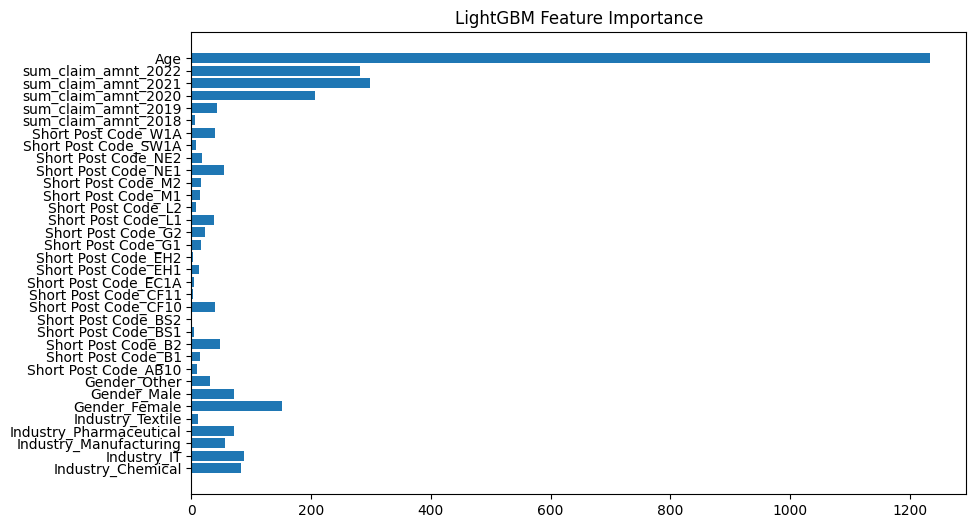

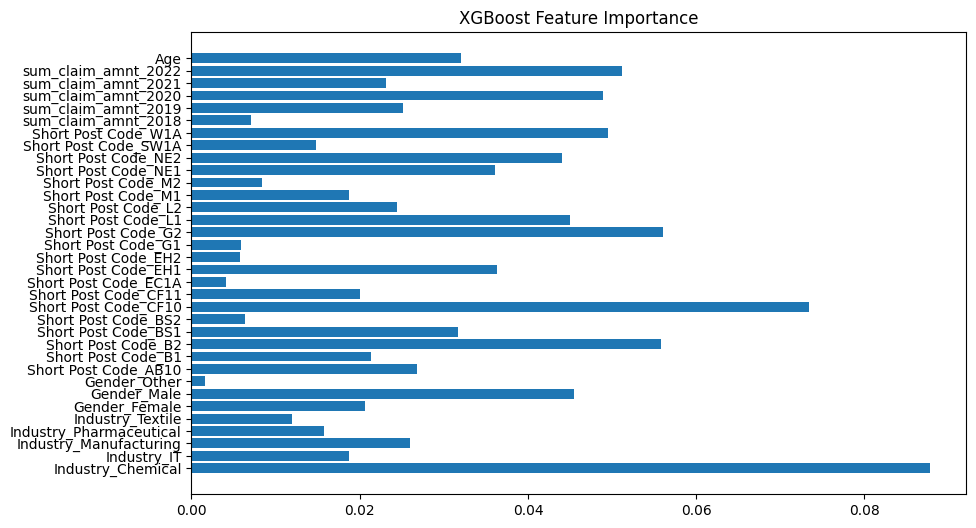

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error,mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Use a meaningful variable name for your dataset
yearly_claims_data = result

# Step 1: Handle outliers using IQR method for each year's claim columns
claim_year_columns = ['sum_claim_amnt_2018', 'sum_claim_amnt_2019', 'sum_claim_amnt_2020',
                      'sum_claim_amnt_2021', 'sum_claim_amnt_2022']
for col in claim_year_columns:
    Q1 = yearly_claims_data[col].quantile(0.25)
    Q3 = yearly_claims_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    q10 = yearly_claims_data[col].quantile(0.10)
    q90 = yearly_claims_data[col].quantile(0.90)
    yearly_claims_data[col] = yearly_claims_data[col].apply(
        lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x)
    )

# Step 2: One-hot encode categorical columns for model input
categorical_features = ['Industry', 'Gender', 'Short Post Code']
encoded_categorical = pd.get_dummies(yearly_claims_data[categorical_features])

# Step 3: Combine features for training
X = pd.concat([encoded_categorical, yearly_claims_data[claim_year_columns + ['Age']]], axis=1)
y = yearly_claims_data['sum_claim_amnt_2023']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train LightGBM model
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)

# Step 6: Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Step 7: Evaluate model performance
print("LightGBM MAE:", mean_absolute_error(y_test, lgb_predictions))
print("LightGBM MSE:", mean_squared_error(y_test, lgb_predictions))
print("LightGBM RMSE:", root_mean_squared_error(y_test, lgb_predictions))
print("LightGBM R²:", r2_score(y_test, lgb_predictions))

print("XGBoost MAE:", mean_absolute_error(y_test, xgb_predictions))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_predictions))
print("XGBoost RMSE:", root_mean_squared_error(y_test, xgb_predictions))
print("XGBoost R²:", r2_score(y_test, xgb_predictions))

# Step 8: Feature importance visualization for LightGBM
plt.figure(figsize=(10, 6))
plt.barh(X.columns, lgb_model.feature_importances_)
plt.title("LightGBM Feature Importance")
plt.show()

# Feature importance visualization for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 3585, number of used features: 33
[LightGBM] [Info] Start training from score 16435.059301
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 3585, number of used features: 34
[LightGBM] [Info] Start training from score 16161.700946
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

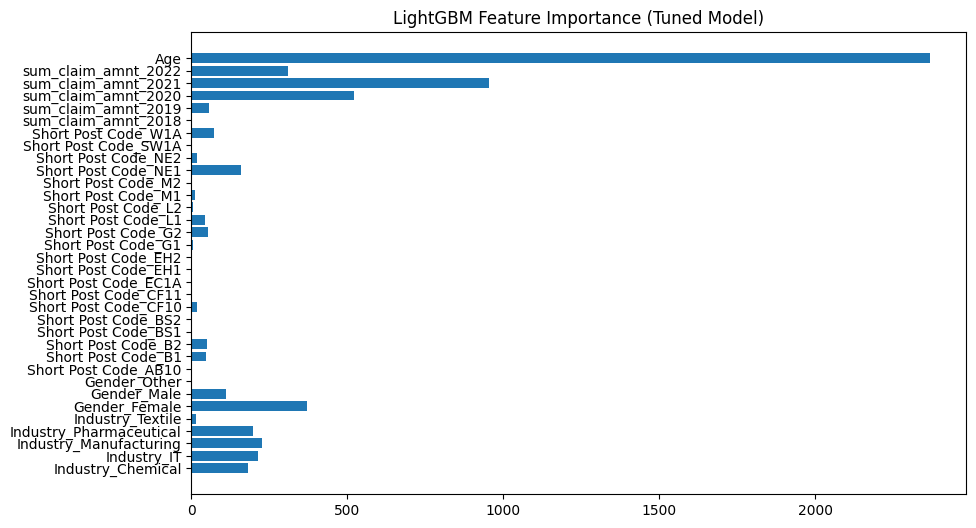

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt



# Step 5: Hyperparameter tuning for LightGBM
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

lgb_model = LGBMRegressor(random_state=42)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate tuned model
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Step 7: Feature importance visualization
importances = best_model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.title("LightGBM Feature Importance (Tuned Model)")
plt.show()

In [ ]:
"""learning_rate:
Controls how much the model adjusts with each boosting step. A lower value (like 0.01) means slower learning but can lead to better accuracy if you use more trees.

n_estimators:
The number of boosting rounds (trees) to build. Here, 200 trees are used.

num_leaves:
The maximum number of leaves (end nodes) in each tree. More leaves can capture more complex patterns, but too many can cause overfitting. Here, 31 leaves per tree are used
"""

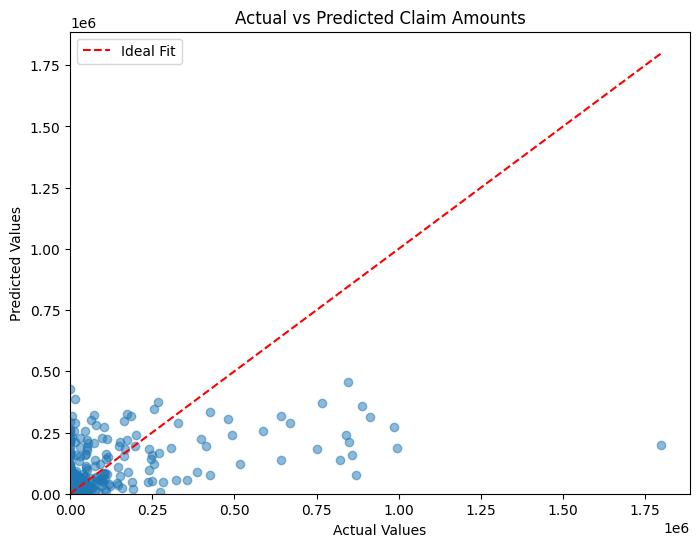

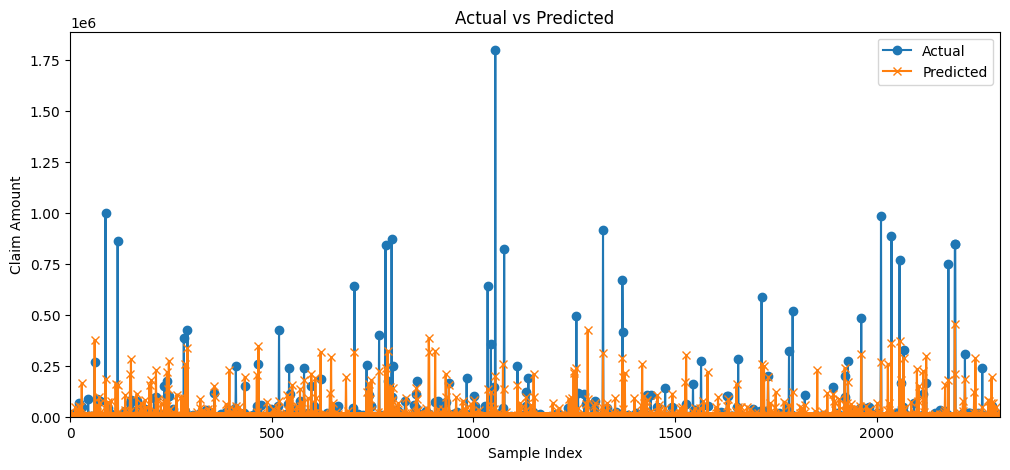

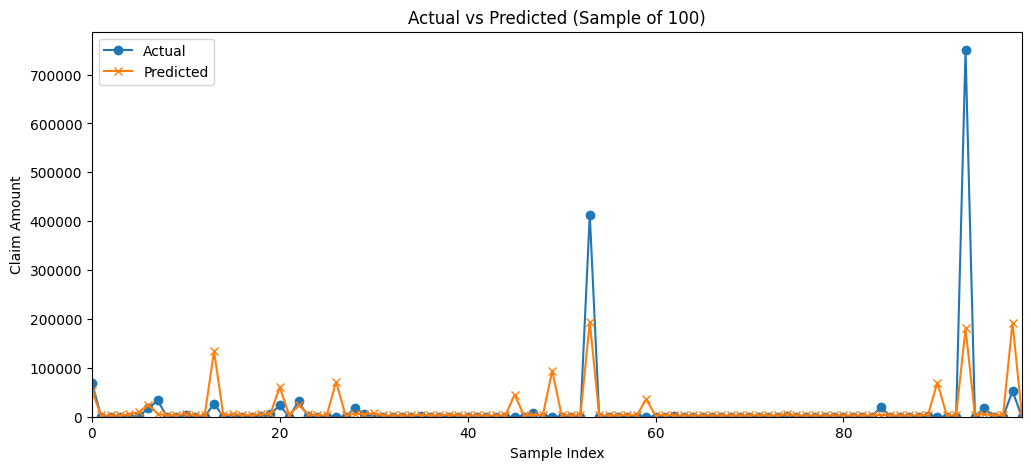

In [27]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Save the comparison DataFrame to CSV
comparison_df.to_csv('predicted_vs_actual.csv', index=False)

# Scatter plot: axes start at zero
plt.figure(figsize=(8, 6))
min_val = 0
max_val = max(comparison_df['Actual'].max(), comparison_df['Predicted'].max())
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Claim Amounts')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()

# Line plot: all samples, y-axis starts at zero
comparison_df_sample = comparison_df.sort_index()
plt.figure(figsize=(12, 5))
plt.plot(comparison_df_sample['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df_sample['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Claim Amount')
plt.ylim(bottom=0)
plt.xlim(left=0, right=len(comparison_df_sample)-1)
plt.legend()
plt.show()

# Line plot: random sample of 100, axes start at zero
comparison_df_sample = comparison_df.sample(100).sort_index()
plt.figure(figsize=(12, 5))
plt.plot(comparison_df_sample['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df_sample['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted (Sample of 100)')
plt.xlabel('Sample Index')
plt.ylabel('Claim Amount')
plt.ylim(bottom=0)
plt.xlim(left=0, right=99)
plt.legend()
plt.show()

In [28]:
## Data creation for quarter wise

import pandas as pd
import numpy as np

def sum_by_quarter_wide(member_month_panel: pd.DataFrame) -> pd.DataFrame:
    panel = member_month_panel.copy()
    panel['Claim Amount'] = pd.to_numeric(panel['Claim Amount'], errors='coerce').fillna(0)
    month_col = panel['Month']

    # Extract year and month
    if pd.api.types.is_string_dtype(month_col):
        date_parsed = pd.to_datetime(month_col, errors='coerce', format='%Y-%m')
    elif pd.api.types.is_period_dtype(month_col):
        date_parsed = month_col.to_timestamp()
    else:
        date_parsed = pd.to_datetime(month_col, errors='coerce')

    # Fallback to Incurred Date if Month is missing
    if date_parsed.isna().all():
        date_parsed = pd.to_datetime(panel.get('Incurred Date'), errors='coerce')

    panel['Year'] = date_parsed.dt.year
    panel['Quarter'] = date_parsed.dt.quarter

    # Filter years between 2018 and 2023
    panel = panel[panel['Year'].between(2018, 2023)]

    static_cols = ['Industry', 'Gender', 'Short Post Code', 'Age']

    def first_valid(series):
        non_null = series.dropna()
        return non_null.iloc[0] if len(non_null) > 0 else np.nan

    # Static info per member
    static_info = (
        panel.sort_values(['Unique Member Reference', 'Year'])
             .groupby('Unique Member Reference', as_index=False)
             .agg({col: first_valid for col in static_cols})
    )

    # Aggregate by year and quarter
    quarterly_agg = (
        panel.groupby(['Unique Member Reference', 'Year', 'Quarter'], as_index=False)['Claim Amount']
             .sum()
    )

    # Pivot to wide format
    quarterly_agg['Quarter_Label'] = quarterly_agg.apply(lambda x: f"Q{x['Quarter']}_{x['Year']}", axis=1)
    wide_quarterly = quarterly_agg.pivot(index='Unique Member Reference', columns='Quarter_Label', values='Claim Amount')

    # Ensure all quarters exist for each year
    all_quarters = [f"Q{q}_{y}" for y in range(2018, 2024) for q in range(1, 5)]
    for col in all_quarters:
        if col not in wide_quarterly.columns:
            wide_quarterly[col] = 0.0

    wide_quarterly = wide_quarterly[all_quarters].fillna(0)
    wide_quarterly.columns = [f'sum_claim_amnt_{col}' for col in wide_quarterly.columns]

    # Merge static info
    output = (
        static_info.merge(wide_quarterly.reset_index(), on='Unique Member Reference', how='left')
                   .sort_values('Unique Member Reference')
                   .reset_index(drop=True)
    )

    return output

In [31]:
quarter_wise_result = sum_by_quarter_wide(member_month_panel)

In [32]:
quarter_wise_result.sample(5)

,Unique Member Reference,Industry,Gender,Short Post Code,Age,sum_claim_amnt_Q1_2018,sum_claim_amnt_Q2_2018,sum_claim_amnt_Q3_2018,sum_claim_amnt_Q4_2018,sum_claim_amnt_Q1_2019,sum_claim_amnt_Q2_2019,sum_claim_amnt_Q3_2019,sum_claim_amnt_Q4_2019,sum_claim_amnt_Q1_2020,sum_claim_amnt_Q2_2020,sum_claim_amnt_Q3_2020,sum_claim_amnt_Q4_2020,sum_claim_amnt_Q1_2021,sum_claim_amnt_Q2_2021,sum_claim_amnt_Q3_2021,sum_claim_amnt_Q4_2021,sum_claim_amnt_Q1_2022,sum_claim_amnt_Q2_2022,sum_claim_amnt_Q3_2022,sum_claim_amnt_Q4_2022,sum_claim_amnt_Q1_2023,sum_claim_amnt_Q2_2023,sum_claim_amnt_Q3_2023,sum_claim_amnt_Q4_2023
3554,EMP00004615,Pharmaceutical,Female,BS2,40,3461.85,0.0,2260.19,0.0,7805.08,847.41,627.18,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
4189,EMP00005446,Manufacturing,Male,BS2,23,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,2247.18,0.00,0.00,0.0,0.0,0.0
500,EMP00000642,IT,Male,G2,14,0.00,0.0,0.00,0.0,0.00,0.00,0.00,2643.14,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
5238,EMP00006810,IT,Female,CF10,54,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,14381.7,2225.43,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
4543,EMP00005911,Textile,Female,AB10,81,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,84317.3,289844.49,181312.02,315717.64,198773.39,110491.65,71503.37,0.0,0.0,0.0


In [33]:
q1_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q1_' in col]
q2_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q2_' in col]
q3_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q3_' in col]
q4_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q4_' in col]


In [34]:
q1_cols

['sum_claim_amnt_Q1_2018',
 'sum_claim_amnt_Q1_2019',
 'sum_claim_amnt_Q1_2020',
 'sum_claim_amnt_Q1_2021',
 'sum_claim_amnt_Q1_2022',
 'sum_claim_amnt_Q1_2023']

Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q1_2018  sum_claim_amnt_Q1_2019  sum_claim_amnt_Q1_2020  sum_claim_amnt_Q1_2021  sum_claim_amnt_Q1_2022  Age
0              False        False                    True                    False             False           True        False         False                 False               False               False                 True                False                 False                 False      

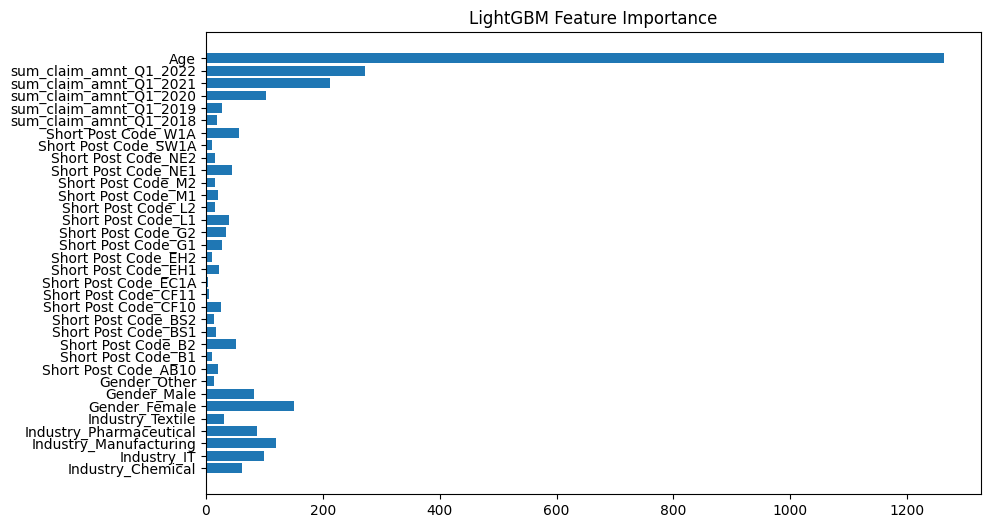

########################################################################################################################################################################################################
Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q2_2018  sum_claim_amnt_Q2_2019  sum_claim_amnt_Q2_2020  sum_claim_amnt_Q2_2021  sum_claim_amnt_Q2_2022  Age
0              False        False                    True                    False             

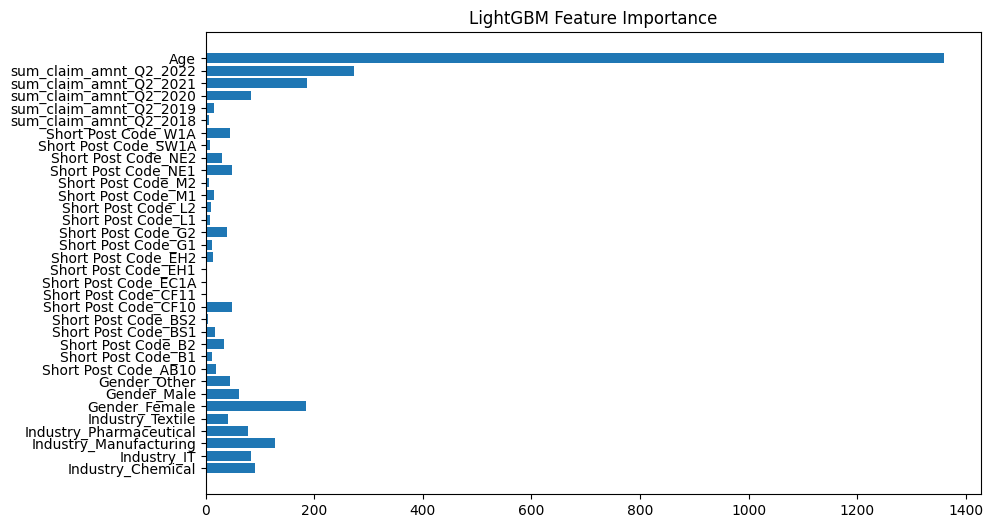

########################################################################################################################################################################################################
Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q3_2018  sum_claim_amnt_Q3_2019  sum_claim_amnt_Q3_2020  sum_claim_amnt_Q3_2021  sum_claim_amnt_Q3_2022  Age
0              False        False                    True                    False             

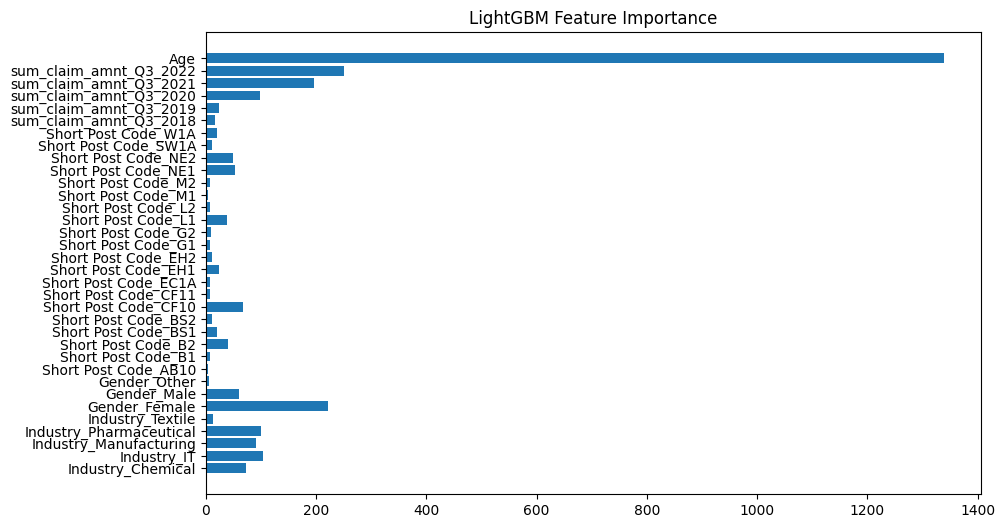

########################################################################################################################################################################################################
Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q4_2018  sum_claim_amnt_Q4_2019  sum_claim_amnt_Q4_2020  sum_claim_amnt_Q4_2021  sum_claim_amnt_Q4_2022  Age
0              False        False                    True                    False             

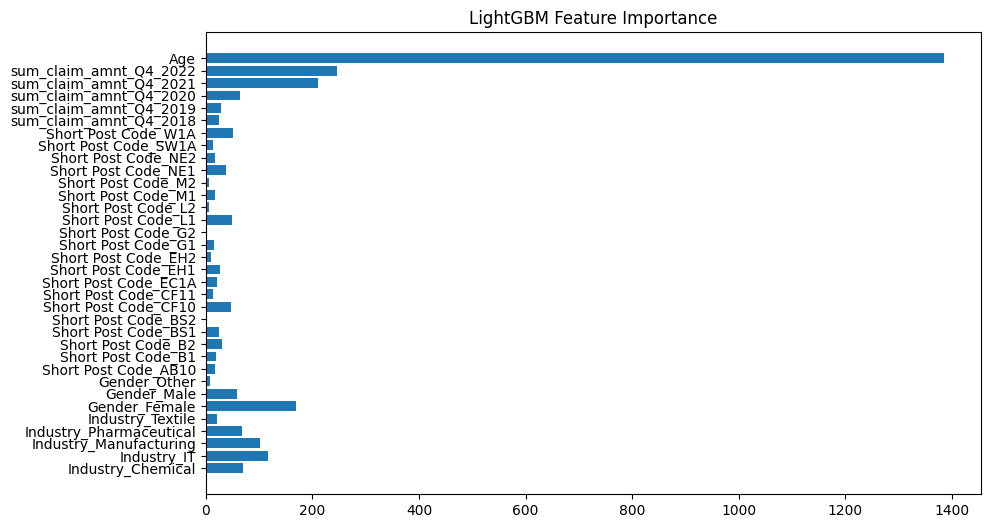

########################################################################################################################################################################################################


In [36]:
qtr_lst = [q1_cols,q2_cols,q3_cols,q4_cols]
for qtr in qtr_lst:
    # Load your dataset
    quarter_result = quarter_wise_result

    # Step 1: Handle outliers using IQR method
    claim_cols = qtr[:-1]
    for col in claim_cols:
        Q1 = quarter_result[col].quantile(0.25)
        Q3 = quarter_result[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        q10 = quarter_result[col].quantile(0.10)
        q90 = quarter_result[col].quantile(0.90)
        quarter_result[col] = quarter_result[col].apply(lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x))

    # Step 2: One-hot encode categorical columns
    categorical_cols = ['Industry','Gender','Short Post Code']
    df_encoded = pd.get_dummies(quarter_result[categorical_cols])

    # Step 3: Combine features
    X = pd.concat([df_encoded, quarter_result[claim_cols + ['Age']]], axis=1)
    y = quarter_result[qtr[-1]]

    #printing X.head and y.head
    print("Features (X) head:")
    print(X.head())
    print("\nTarget (y) head:")
    print(y.head())

    # Step 4: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    lgb_model = LGBMRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)


    print("LightGBM RMSE:", root_mean_squared_error(y_test, lgb_pred))
    print("LightGBM MAE:", mean_absolute_error(y_test, lgb_pred))
    print("LightGBM MSE:", mean_squared_error(y_test, lgb_pred))
    print("LightGBM R²:", r2_score(y_test, lgb_pred))

    # Step 8: Feature importance visualization
    plt.figure(figsize=(10,6))
    plt.barh(X.columns, lgb_model.feature_importances_)
    plt.title("LightGBM Feature Importance")
    plt.show()

    print("#"*200)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 5332.520536
LightGBM RMSE (sum_claim_amnt_Q1_2023): 29566.64562964011
LightGBM R² (sum_claim_amnt_Q1_2023): 0.06740311654973474


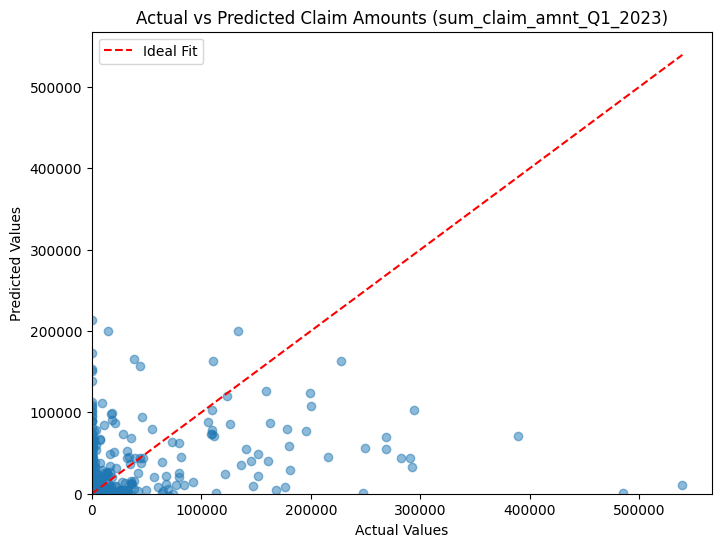

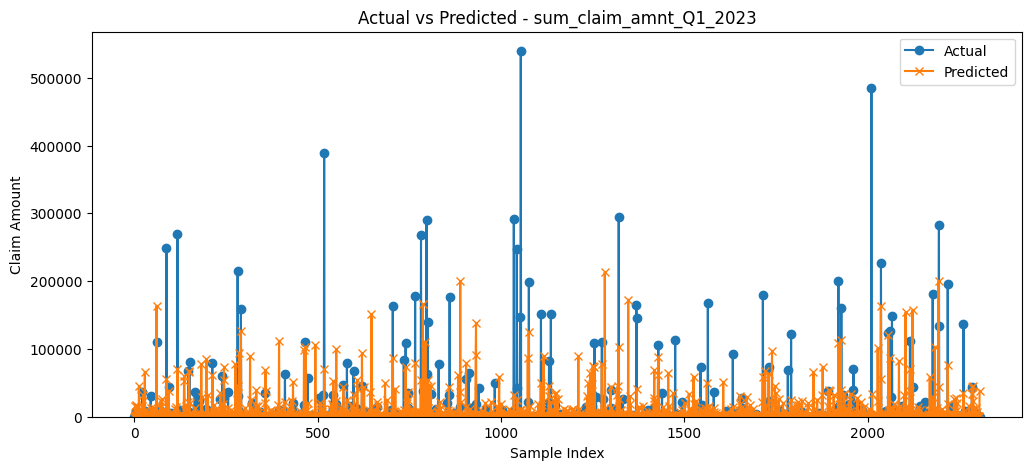

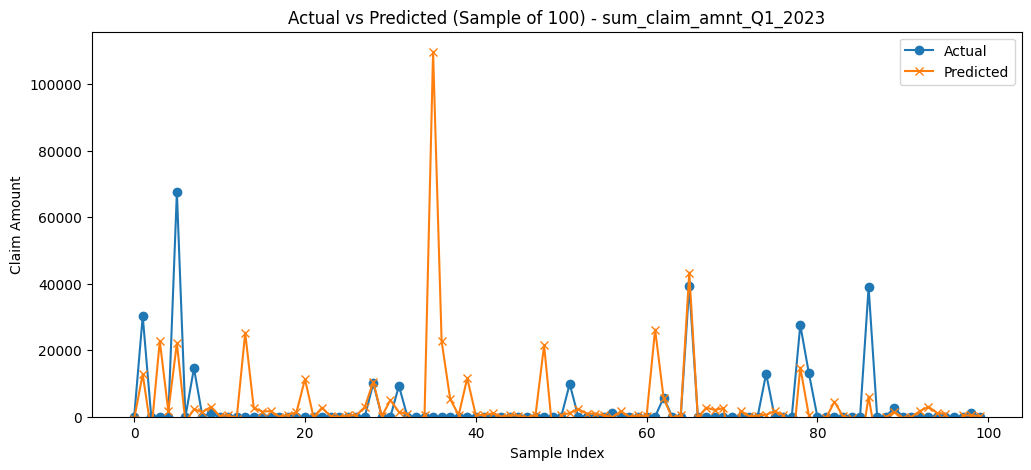

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 4670.507671
LightGBM RMSE (sum_claim_amnt_Q2_2023): 22956.03465745228
LightGBM R² (sum_claim_amnt_Q2_2023): 0.12881651162200902


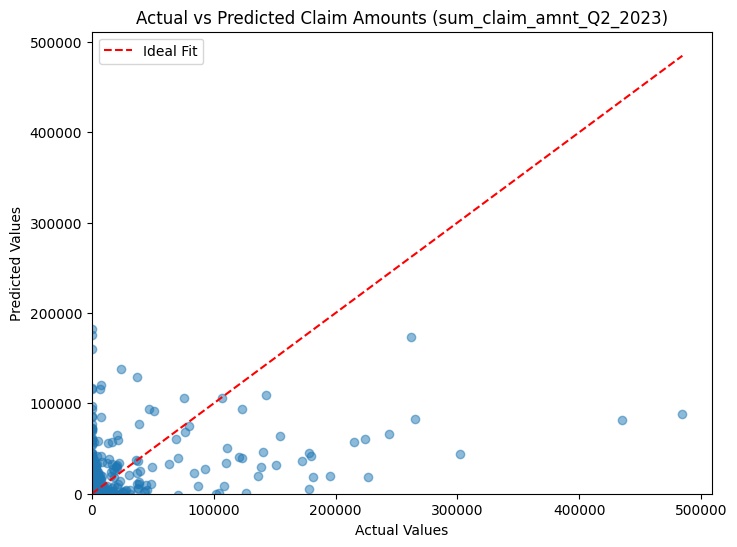

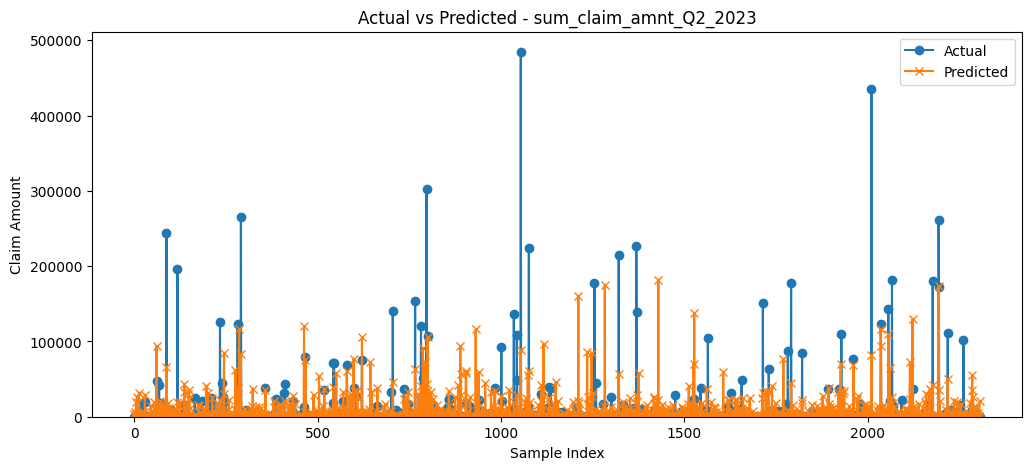

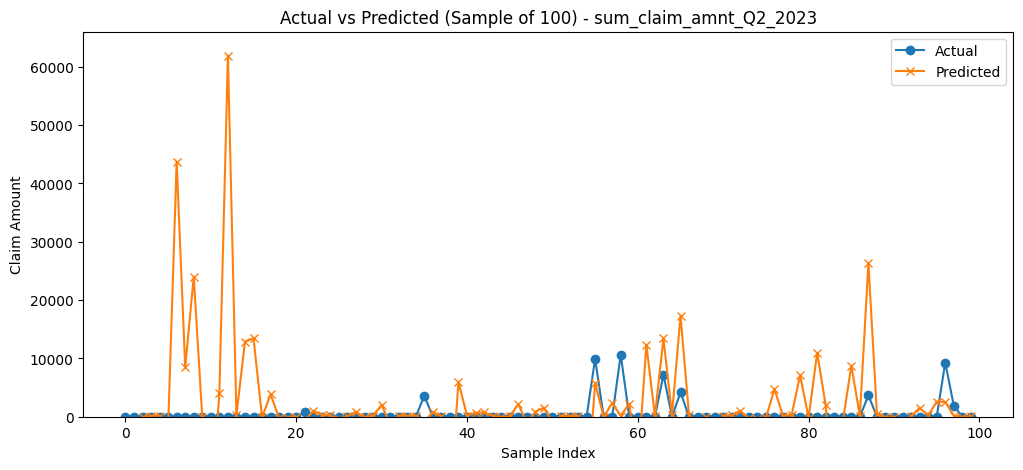

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 3438.117707
LightGBM RMSE (sum_claim_amnt_Q3_2023): 20199.896938953756
LightGBM R² (sum_claim_amnt_Q3_2023): 0.06264666701933086


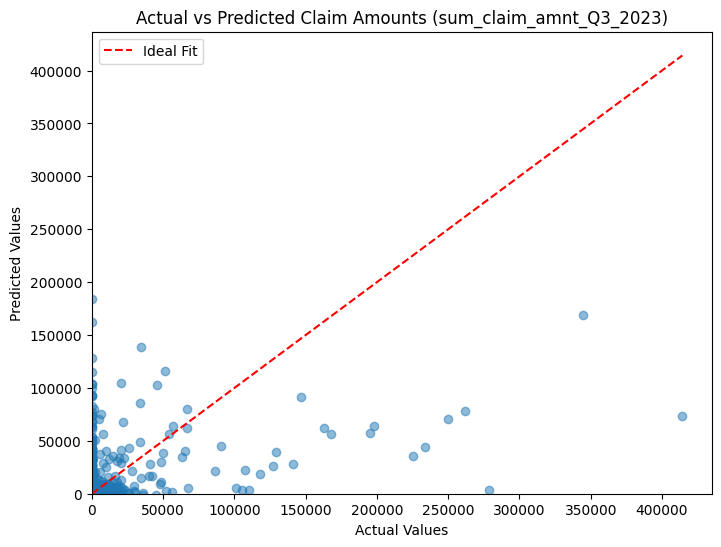

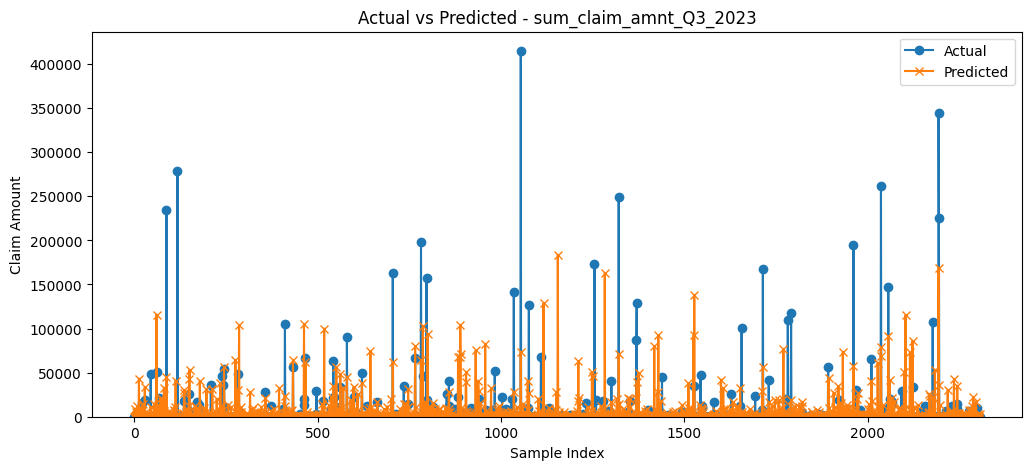

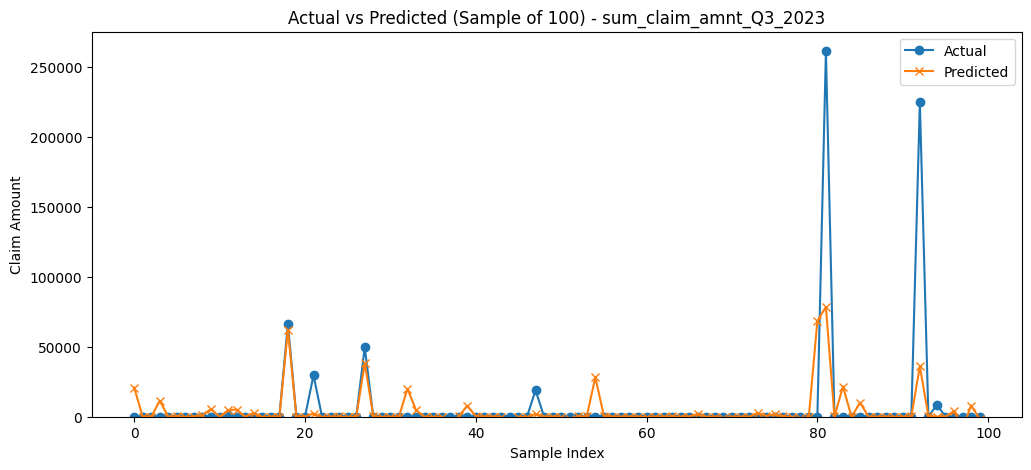

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 2764.827118
LightGBM RMSE (sum_claim_amnt_Q4_2023): 18419.68642568923
LightGBM R² (sum_claim_amnt_Q4_2023): 0.10875326247634731


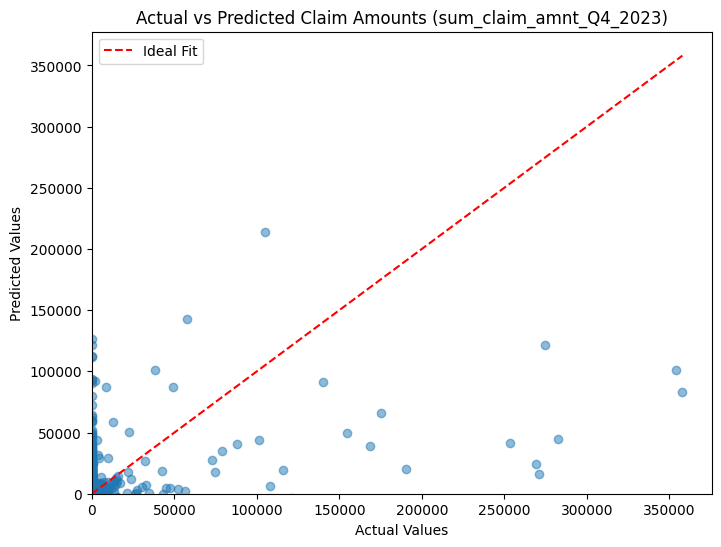

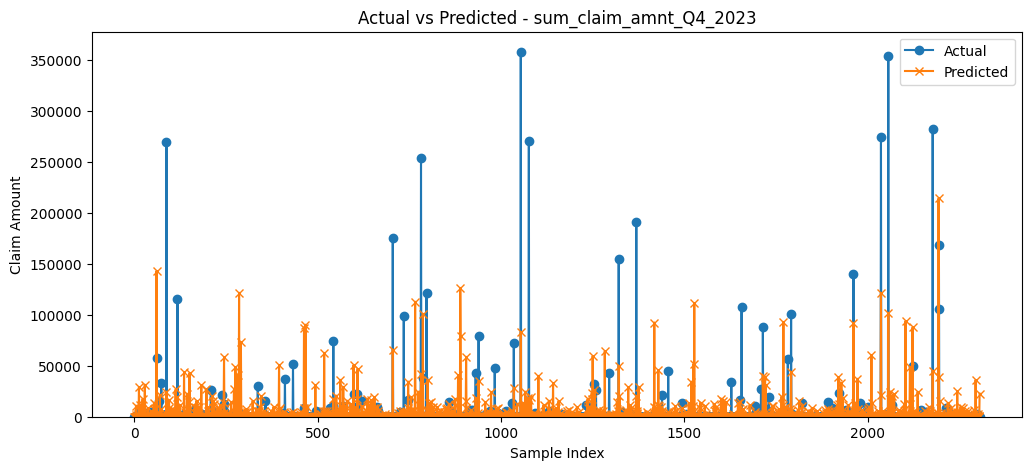

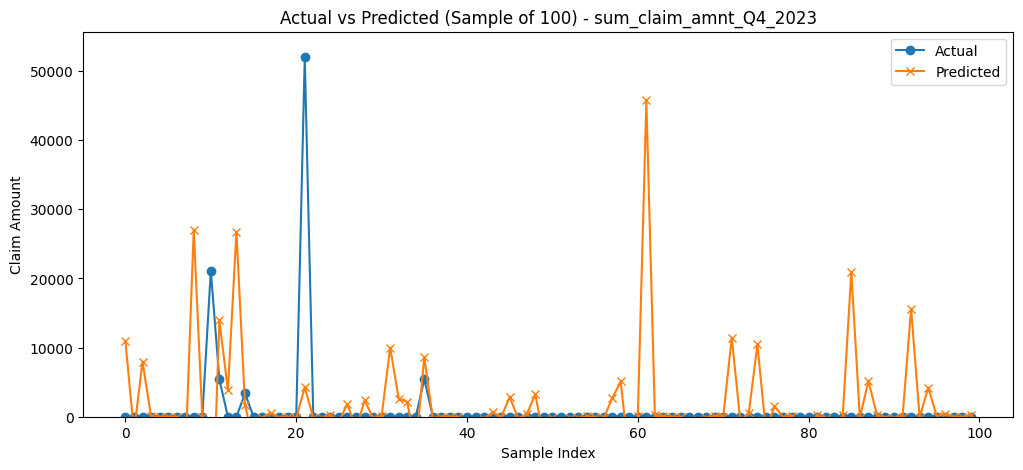

########################################################################################################################################################################################################


In [39]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

qtr_lst = [q1_cols, q2_cols, q3_cols, q4_cols]
quarter_results = {}

for qtr in qtr_lst:
    # Load your dataset
    df = quarter_wise_result.copy()

    # Step 1: Handle outliers using IQR method
    claim_cols = qtr[:-1]
    for col in claim_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        q10 = df[col].quantile(0.10)
        q90 = df[col].quantile(0.90)
        df[col] = df[col].apply(lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x))

    # Step 2: One-hot encode categorical columns
    categorical_cols = ['Industry', 'Gender', 'Short Post Code']
    df_encoded = pd.get_dummies(df[categorical_cols])

    # Step 3: Combine features
    X = pd.concat([df_encoded, df[claim_cols + ['Age']]], axis=1)
    y = df[qtr[-1]]

    # Step 4: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 5: Train LightGBM
    lgb_model = LGBMRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)

    print(f"LightGBM RMSE ({qtr[-1]}):", root_mean_squared_error(y_test, lgb_pred))
    print(f"LightGBM R² ({qtr[-1]}):", r2_score(y_test, lgb_pred))

    # Step 6: Actual vs Prediction DataFrame
    comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': lgb_pred})
    quarter_results[qtr[-1]] = comparison_df

    # Scatter plot with axes starting at zero
    plt.figure(figsize=(8, 6))
    min_val = 0
    max_val = max(comparison_df['Actual'].max(), comparison_df['Predicted'].max())
    plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Claim Amounts ({qtr[-1]})')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

    # Line plot for all samples, y-axis starts at zero
    comparison_sample = comparison_df.sort_index()
    plt.figure(figsize=(12, 5))
    plt.plot(comparison_sample['Actual'].values, label='Actual', marker='o')
    plt.plot(comparison_sample['Predicted'].values, label='Predicted', marker='x')
    plt.title(f'Actual vs Predicted - {qtr[-1]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Claim Amount')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

    # Line plot for a sample of 100, y-axis starts at zero
    comparison_sample = comparison_df.sample(100).sort_index()
    plt.figure(figsize=(12, 5))
    plt.plot(comparison_sample['Actual'].values, label='Actual', marker='o')
    plt.plot(comparison_sample['Predicted'].values, label='Predicted', marker='x')
    plt.title(f'Actual vs Predicted (Sample of 100) - {qtr[-1]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Claim Amount')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

    print("#" * 200)

# Export all quarters to a single Excel file
with pd.ExcelWriter('actual_vs_predicted_all_quarters.xlsx') as writer:
    for quarter_name, df in quarter_results.items():
        df.to_excel(writer, sheet_name=quarter_name, index=False)